##  Activity for Chapter 3 - Create Customer Segments for a Loan Campaign

Creating customer segments to maximize the effectiveness of their personal loan campaign. Find the natural customer types in the data and discover the features that differentiate them. Then identify the customer segments that have the highest propensity to take the loan. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

In [2]:
loan = pd.read_csv('G:\My Drive\Projects\Marketing Data Science\Bank_Personal_Loan_Modelling-1_ch3.csv')
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
scaler = StandardScaler()
loan[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(loan[['Income', 'CCAvg']]) 
loan
# add 2 new scaled cols to loan dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,-0.733757,-0.021710
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,-1.276892,-0.880087
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,-1.081363,-0.937312
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,-0.538229,-0.822862


In [5]:
loan[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


<Axes: xlabel='Income_scaled', ylabel='CCAvg_scaled'>

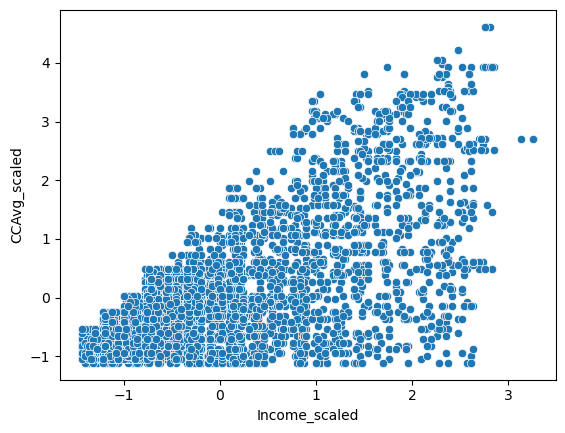

In [6]:
sns.scatterplot(loan, x='Income_scaled', y='CCAvg_scaled')

In [7]:
model = KMeans(n_clusters = 3, random_state = 42)

In [8]:
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(loan[cluster_cols])

loan['Cluster'] = model.predict(loan[cluster_cols])

C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,-0.733757,-0.021710,1
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,-1.276892,-0.880087,1
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,-1.081363,-0.937312,1
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,-0.538229,-0.822862,1


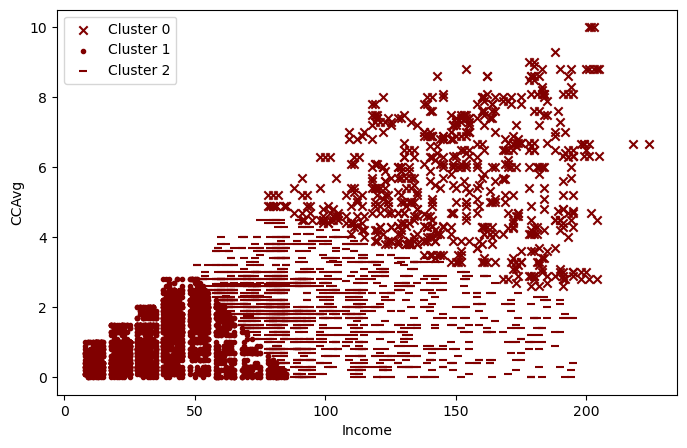

In [10]:
markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = loan[loan.Cluster == clust] 
    plt.scatter(temp.Income, temp.CCAvg, \
                marker=markers[clust], \
                color = 'maroon',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [11]:
# Average values for Income and CCAvg by the 3 clusters 
loan.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


<Axes: xlabel='Cluster'>

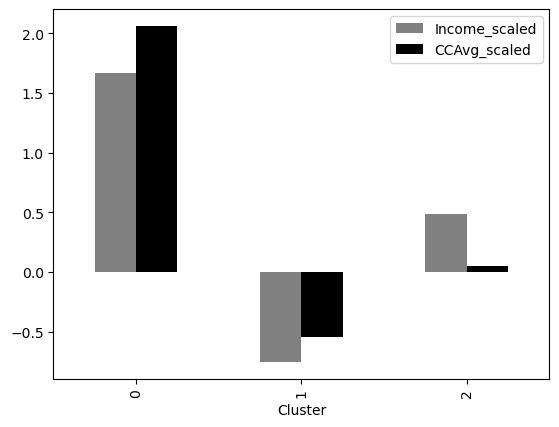

In [12]:
# visual comparison of the clusters using the standardized values for income and CCAvg 
# you can see the averages of the values of the features against each cluster on a standardized scale 
loan.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['gray', 'black'])

In [13]:
# get the average values for all other columns for each cluster 
# esp look at the personal loan column 
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']

loan.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


#### Cluster groups
- Cluster 0: High rollers 
- Cluster 1: Low spend potential 
- Cluster 2: Average Joes 

## Activity 3.02 - Customer Segmentation with Multiple Features 

Creating customer segments to maximize the effectiveness of their personal loan campaign. Find the natural customer types in the data and discover the features that differentiate them. Then identify the customer segments that have the highest propensity to take the loan. 

But now we will use 5 features to create the clusters, instead of 2 features

In [18]:
# create a copy of the dataset named bank_scaled and perform standardization on cols being used for the clusters 
bank_scaled = loan.copy()

cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']

bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])  
#update the column values we want to use (the rest stay the same)

In [25]:
# make sure the scaling has been properly applied to our predictive cols 
bank_scaled.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000
mean,2500.500000,-2.131628e-18,-1.179501e-16,1.449507e-16,93152.503000,2.396400,-6.394885e-17,1.881000,-5.613288e-17,0.096000,0.104400,0.06040,0.596800,0.294000,1.449507e-16,-6.394885e-17,1.231000
std,1443.520003,1.000100e+00,1.000100e+00,1.000100e+00,2121.852197,1.147663,1.000100e+00,0.839869,1.000100e+00,0.294621,0.305809,0.23825,0.490589,0.455637,1.000100e+00,1.000100e+00,0.657971
min,1.000000,-1.948906e+00,-2.014911e+00,-1.428969e+00,9307.000000,1.000000,-1.108987e+00,1.000000,-5.555239e-01,0.000000,0.000000,0.00000,0.000000,0.000000,-1.428969e+00,-1.108987e+00,0.000000
25%,1250.750000,-9.019702e-01,-8.812043e-01,-7.554825e-01,91911.000000,1.000000,-7.084116e-01,1.000000,-5.555239e-01,0.000000,0.000000,0.00000,0.000000,0.000000,-7.554825e-01,-7.084116e-01,1.000000
50%,2500.500000,-2.952359e-02,-9.121982e-03,-2.123482e-01,93437.000000,2.000000,-2.506106e-01,2.000000,-5.555239e-01,0.000000,0.000000,0.00000,1.000000,0.000000,-2.123482e-01,-2.506106e-01,1.000000
75%,3750.250000,8.429230e-01,8.629604e-01,5.263146e-01,94608.000000,3.000000,3.216407e-01,3.000000,4.375576e-01,0.000000,0.000000,0.00000,1.000000,1.000000,5.263146e-01,3.216407e-01,2.000000
max,5000.000000,1.889859e+00,1.996667e+00,3.263712e+00,96651.000000,4.000000,4.613525e+00,3.000000,5.688108e+00,1.000000,1.000000,1.00000,1.000000,1.000000,3.263712e+00,4.613525e+00,2.000000


In [27]:
model = KMeans(n_clusters=3, random_state=42) # get 3 clusters 

#fit the model using our scaled cluster columns
model.fit(bank_scaled[cluster_cols])

# predict the clusters using the 5 cols from the scaled data and add clusters into a new column called Cluster 
bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols]) 

C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Use PCA on the scaled columns, create 2 new clusters pc1 and pc2 

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

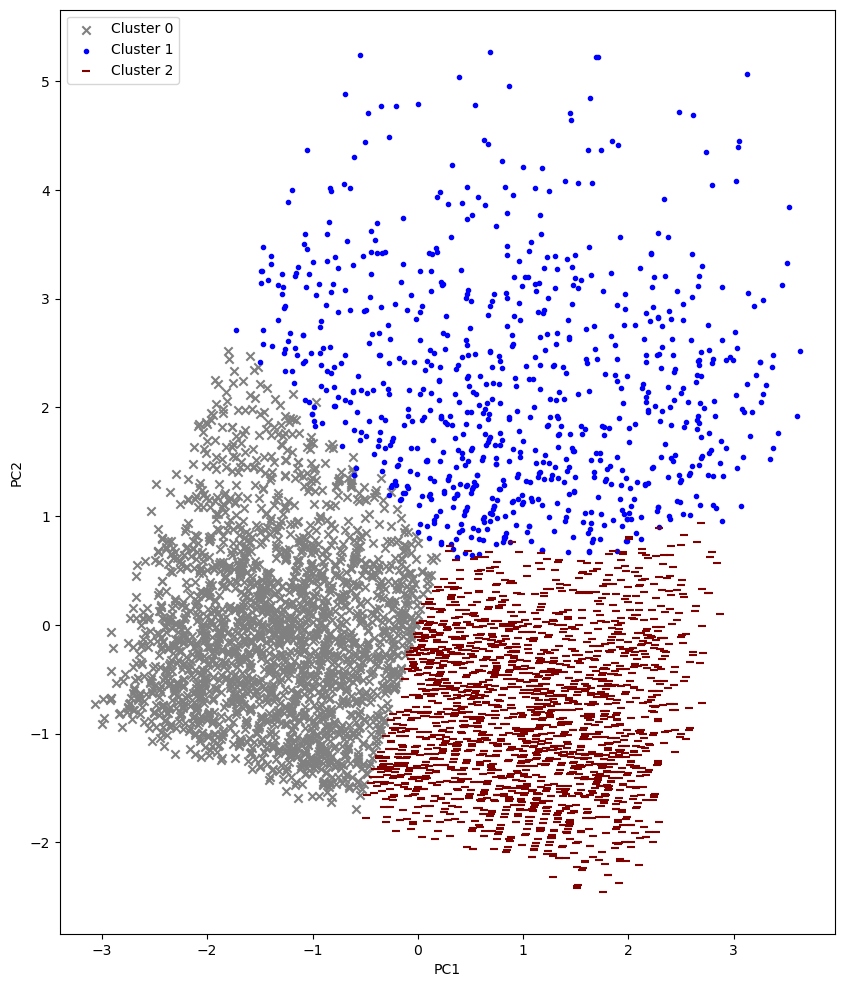

In [31]:
# visualize the clusters by using different markers on a scatterplot between pc1 and pc2 
markers = ['x', '.', '_']
colors = ['gray', 'blue', 'maroon']
plt.figure(figsize = [10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color=colors[clust])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [33]:
# add the new cluster labels to our OG data set and then get the mean for each col from our OG dataset 
loan['Cluster'] = bank_scaled.Cluster
loan.groupby('Cluster')[cluster_cols].mean()

# we see that only Age and Experience are noticably different across all 3 clusters. all other features have similar values 

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


In [36]:
# to better understand the clusters using other relevant features, print the avg values against the other clusters 
# to see who would be most likely to take a loan 

cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online', 'CreditCard','Personal Loan']
loan.groupby('Cluster')[cols].mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Online,CreditCard,Personal Loan
Cluster,,,,,,,,,,
0,55.536044,30.233826,58.941774,2.397874,1.367514,1.945471,45.134935,0.604898,0.300370,0.039741
1,43.672435,18.644005,147.650185,2.002472,4.856403,1.577256,116.279357,0.613103,0.299135,0.398022
2,35.116428,9.873705,60.124322,2.552047,1.382121,1.933399,44.771584,0.581648,0.285150,0.035520


Cluster 1 has the high propensity for taking a loan at .398 

- Cluster 0: Low spending old timers (low spend, high age, avg income)
- Cluster 1: Middle aged spenders (high income, high spend)
- Cluster 2: young low spenders (low spend, low age, avg income) 